# Linear Regession

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep = '\s+', skiprows = 22, header = None)

# independent features
data = np.hstack((raw_df.values[::2, :], raw_df.values[1::2, :2]))

# dependent feature
target = raw_df.values[1::2, 2]
del raw_df

In [3]:
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])

df = pd.DataFrame(data = data, columns = feature_names)
df['PRICE'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [5]:
regressor = LinearRegression()

score = cross_val_score(
    estimator = regressor, 
    X = data, 
    y = target, 
    scoring = 'neg_mean_squared_error', 
    cv = 5)

In [6]:
score

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [7]:
np.mean(score)

-37.13180746769914

## Ridge Regression

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [9]:
ridge = Ridge()

parameter = dict(alpha = [1e-10, 1e-5, 1e-2, 1e-1, 0, 1, 2, 3, 5, 10, 20, 30, 40, 50])

ridge_regression = GridSearchCV(
    estimator = ridge,
    param_grid = parameter,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 1
)

score = ridge_regression.fit(X = data, y = target)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [10]:
ridge_regression.best_params_

{'alpha': 50}

In [11]:
ridge_regression.best_score_

-30.770000796597675

## Lasso Regression

In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [13]:
lasso = Lasso()

parameter = dict(alpha = [1e-10, 1e-5, 1e-2, 1e-1, 0, 1, 2, 3, 5, 10, 20, 30, 40, 50])
lasso_regression = GridSearchCV(
    estimator = lasso,
    param_grid = parameter,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 1
)
lasso_regression.fit(X = data, y = target)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


d:\Python\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+03, tolerance: 3.919e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\Python\li

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 0.1, 0, 1, 2, 3, 5, 10,
                                   20, 30, 40, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [14]:
lasso_regression.best_params_

{'alpha': 0.1}

In [15]:
lasso_regression.best_score_

-34.830432318202654

# Elastic Net

In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [17]:
elastic = ElasticNet()

parameter = dict(alpha = [1e-10, 1e-5, 1e-2, 1e-1, 0, 1, 2, 3, 5, 10, 20, 30, 40, 50])

elastic_regression = GridSearchCV(
    estimator = elastic,
    param_grid = parameter,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 1
)

score = elastic_regression.fit(X = data, y = target)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


d:\Python\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+03, tolerance: 3.919e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\Python\li

In [18]:
elastic_regression.best_params_

{'alpha': 1}

In [19]:
elastic_regression.best_score_

-32.05368976651792

### Predictions

In [20]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test =  tts(data, target, test_size = 0.3, random_state = 0)

In [21]:
prediction_lasso = lasso_regression.predict(X_test)
prediction_ridge = ridge_regression.predict(X_test)
prediction_elastic = elastic_regression.predict(X_test)

<Figure size 720x576 with 0 Axes>

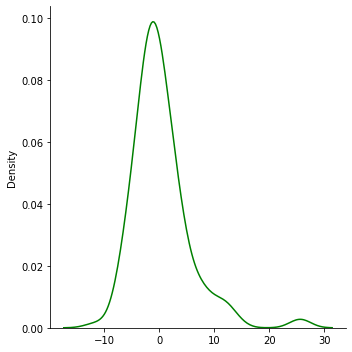

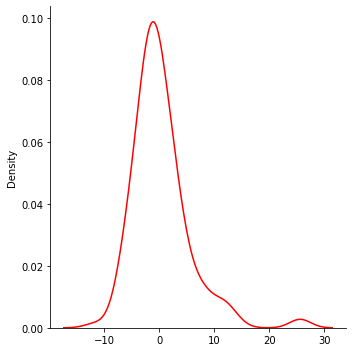

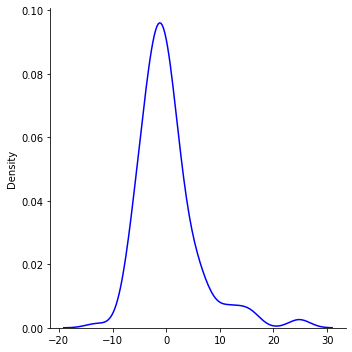

In [29]:
fig
sns.displot(y_test - prediction_lasso, kind = 'kde', color = 'g', label = 'Lasso')
sns.displot(y_test - prediction_lasso, kind = 'kde', color = 'r', label = 'Ridge')
sns.displot(y_test - prediction_elastic, kind = 'kde', color = 'b', label = 'Elastic')
plt.show()

In [30]:
from sklearn.metrics import r2_score

In [71]:
r2_score(y_true = y_test, y_pred = prediction_lasso)

0.6726640913451345

In [72]:
r2_score(y_true = y_test, y_pred = prediction_ridge)

0.6702581765510012